# Model Evaluation on Iris Data Set - Aditya - GCD - Term 3

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Previous Models evaluated again](#section4)<br>
5. [Modelling and Prediction using PCA, KNN and SVM](#section5)<br>
6. [Conclusion](#section6)<br>


<a id = section1></a>

## 1. Problem Statement

Given the dataset containing __Iris Species Data__, use PCA, KNN and SVM to evaluate multiple models. 

<a id = section2></a>

## 2. Data Loading and Description

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


__Importing Packages__

In [439]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, SVR

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Importing the Dataset

In [440]:
iris = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<a id = section3></a>

## 3. Exploratory Data Analysis (Data Pre-processing and Cleaning also)

#### Check the shape of the dataset

In [441]:
iris.shape

(150, 6)

#### Check the columns present in the dataset

In [442]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Check the info of the dataset

In [443]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


#### Check the missing values present in the dataset. 

In [444]:
iris.isnull().sum()[iris.isnull().sum() !=0]

Series([], dtype: int64)

#### Drop the Id column and encode the Species label

In [445]:
iris = iris.drop('Id', 1)

In [446]:
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

In [447]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


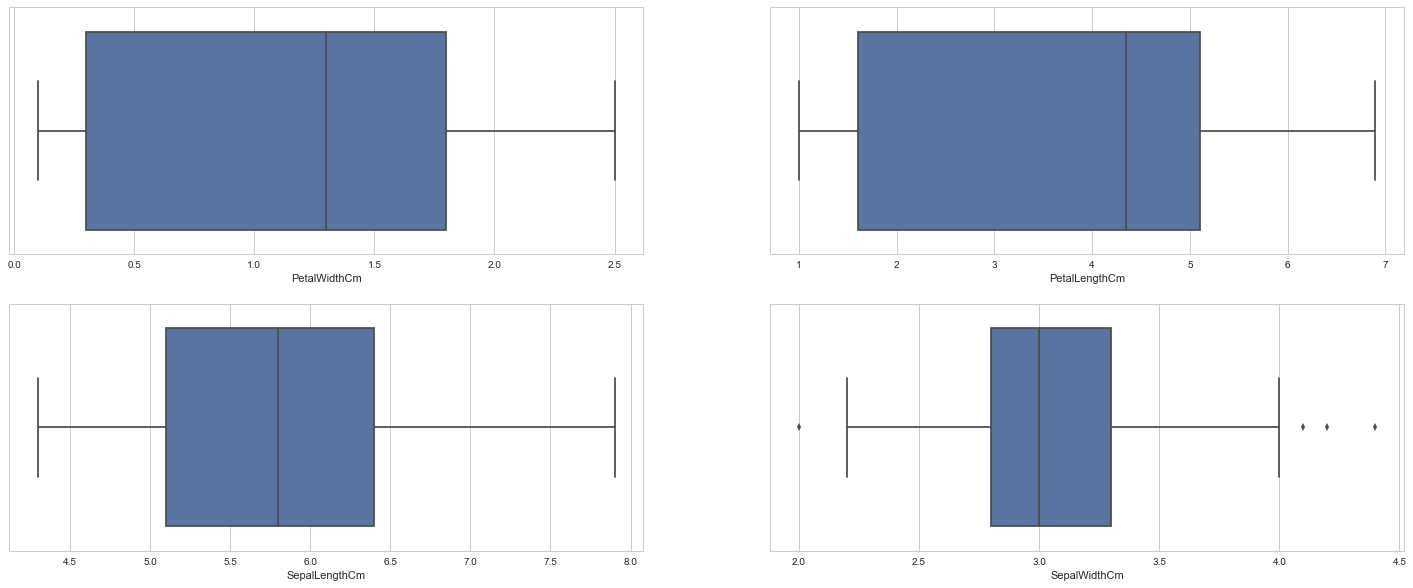

In [448]:
f = plt.figure(figsize=(25,10))
f.add_subplot(221)
sns.boxplot(x=iris['PetalWidthCm'])
f.add_subplot(222)
sns.boxplot(x=iris['PetalLengthCm'])
f.add_subplot(223)
sns.boxplot(x=iris['SepalLengthCm'])
f.add_subplot(224)
sns.boxplot(x=iris['SepalWidthCm'])

## Some actual EDA on the data set to understand more

In [449]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [450]:
iris.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

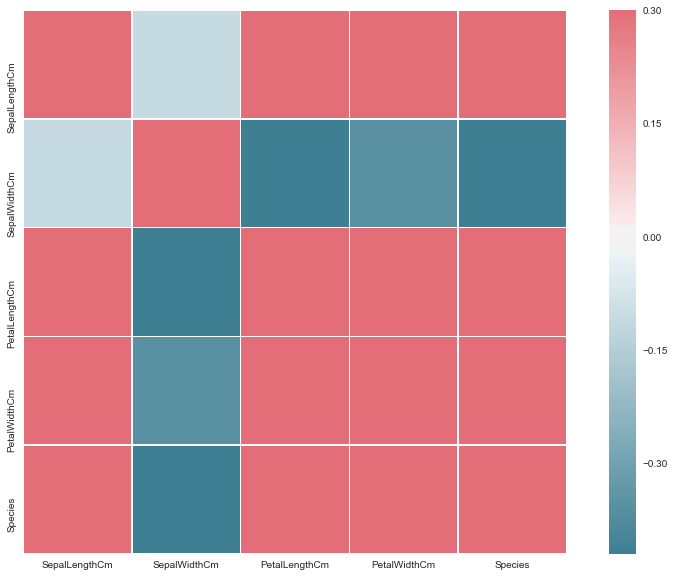

In [451]:
corr = iris.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

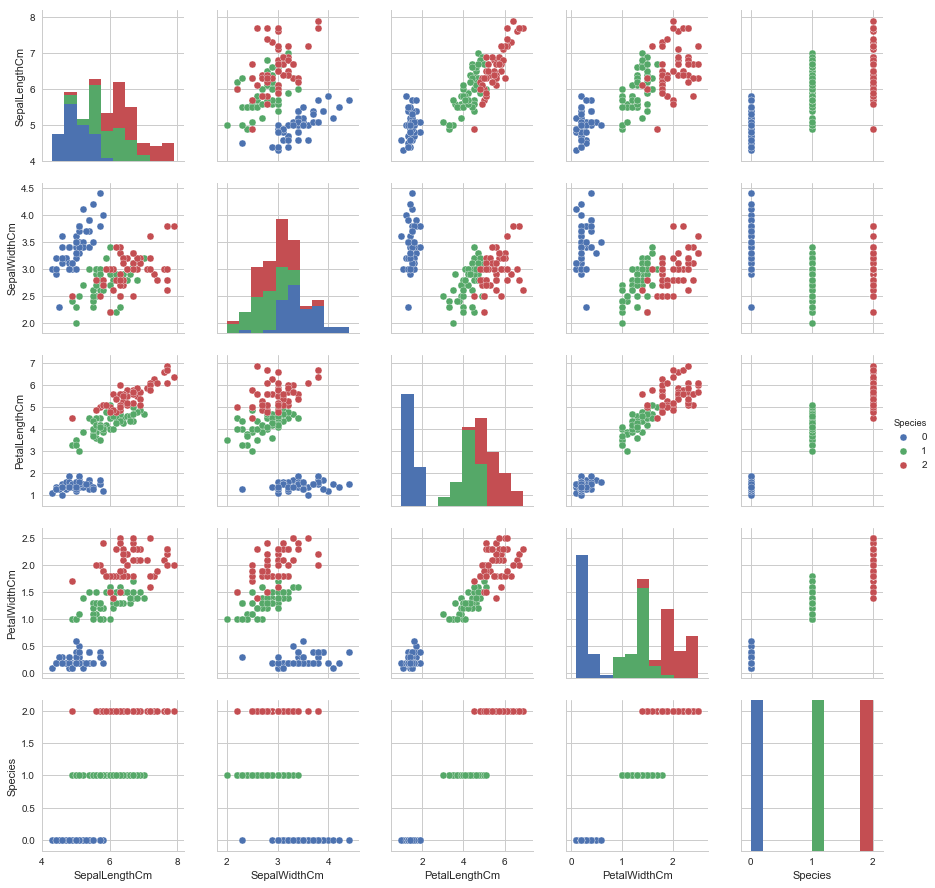

In [452]:
sns.pairplot(data=iris,kind='scatter', hue='Species')

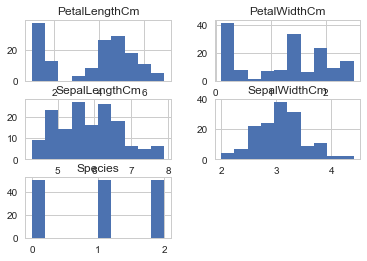

In [453]:
iris.hist()
plt.show()

## Correlation between variables

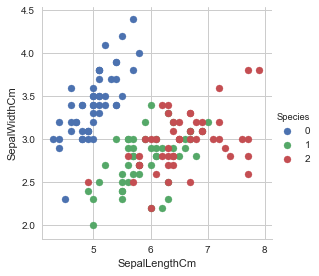

In [454]:
sns.FacetGrid(iris, hue="Species", size=4) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend();
plt.show();

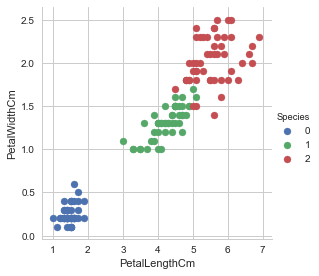

In [455]:
sns.FacetGrid(iris, hue="Species", size=4) \
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
    .add_legend();
plt.show();

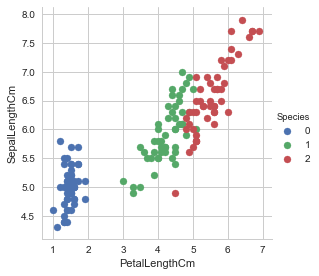

In [456]:
sns.FacetGrid(iris, hue="Species", size=4) \
    .map(plt.scatter, "PetalLengthCm", "SepalLengthCm") \
    .add_legend();
plt.show();

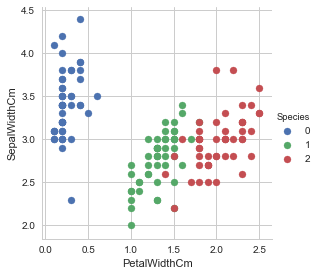

In [457]:
sns.FacetGrid(iris, hue="Species", size=4) \
    .map(plt.scatter, "PetalWidthCm", "SepalWidthCm") \
    .add_legend();
plt.show();

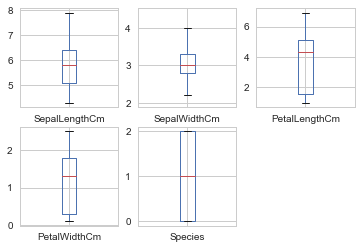

In [458]:
iris.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

## EDA Conclusions

1. As stated, it has data about three iris species Iris-setosa, Iris-versicolor and Iris-virginica with each 50 samples.
2. Using SepalLengthCm and SepalWidthCm correlation, 
    1. Setosa flowers can be distinguished from others
    2. It is difficult to differentiate Versicolor from Viginica as they have considerable overlap
3. Using Correlation between PetalLengthCm and PetalWidthCm features, 
    1. All the three flower species can be easily differentiated
4. From the Heatmap of correlation, it seems that all features have either strong positive or negative correlation with the Species that we want to classify.



<a id = section4></a>

## 4. Previous Models Evaluated Again

#### Preparing X and y using pandas

In [459]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

####  Spliting X and y into train and test dataset.

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#### Checking the shape of X and y of train dataset

In [461]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


#### Checking the shape of X and y of test dataset

In [462]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


### Logistic Regression

In [463]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [464]:
y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)
print('Accuracy score for Logistic Regression is:', accuracy_score(y_test,y_pred_test))

Accuracy score for Logistic Regression is: 0.8


In [465]:
print (confusion_matrix(y_test, y_pred_test))

[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


### Decision Tree Classifier

In [466]:
param_grid = {'max_depth':range(1, 20, 2)}
DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, param_grid, cv = 10, scoring='accuracy', n_jobs = -1).fit(X_train,y_train)

In [467]:
y_pred = clf_DT.predict(X_test)
print ('Accuracy score for Decision Tree Classifier is:', accuracy_score(y_test,y_pred))

Accuracy score for Decision Tree Classifier is: 0.9


In [468]:
print('Confusion matrix for test data with DT is:\n',confusion_matrix(y_test, y_pred))

Confusion matrix for test data with DT is:
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


### Random Forest Classifier

#### Instantiating Random Forest Classifier 

In [469]:
model1 = RandomForestClassifier(random_state = 0)

#### Fitting the model on X_train and y_train

In [470]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Using the model for prediction

In [471]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [472]:
print ('Accuracy score for Random Forest Classifier is:', accuracy_score(y_test, prediction1))

Accuracy score for Random Forest Classifier is: 0.9


### Random Forest Regressor

In [473]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [474]:
predictions = rf.predict(X_test)
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.13999999999999999
RMSE for test set is 0.30441200151548997


<a id = section5></a>

## 5. Modelling and Prediction using PCA, KNN and SVM

### 5.1 PCA

In [475]:
pca = PCA(0.95).fit(X)

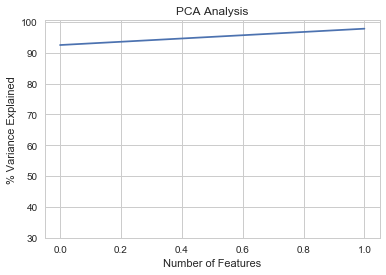

In [476]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [477]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

2 components explain 95% of the variation in data


In [478]:
pca = PCA(n_components=2, random_state = 0)
X = pca.fit_transform(X)
print(X.shape)

(150, 2)


####  Spliting X and y into train and test dataset.

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#### Checking the shape of X and y of train dataset

In [480]:
print(X_train.shape)
print(y_train.shape)

(120, 2)
(120,)


#### Checking the shape of X and y of test dataset

In [481]:
print(X_test.shape)
print(y_test.shape)

(30, 2)
(30,)


#### Instantiating Random Forest Regressor 

In [482]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [483]:
predictions = rf.predict(X_test)
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.14666666666666667
RMSE for test set is 0.35023801430836526


#### Instantiating Random Forest Classifier 

In [484]:
model1 = RandomForestClassifier(random_state = 0)

#### Fitting the model on X_train and y_train

In [485]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Using the model for prediction

In [486]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [487]:
print ('Accuracy score for Random Forest Classifier is:', accuracy_score(y_test, prediction1))

Accuracy score for Random Forest Classifier is: 0.8


### 5.2 KNN

In [488]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [489]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

####  Spliting X and y into train and test dataset.

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [491]:
knn = KNeighborsClassifier()

In [492]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [493]:
y_preds = knn.predict(X_test)

In [494]:
knn_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.9333333333333333


In [495]:
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.14666666666666667
RMSE for test set is 0.35023801430836526


### 5.3 KNeighborsRegressor

In [496]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [497]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

####  Spliting X and y into train and test dataset.

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [499]:
# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_preds = regressor.predict(X_test)

In [500]:
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.14666666666666667
RMSE for test set is 0.35023801430836526


In [501]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

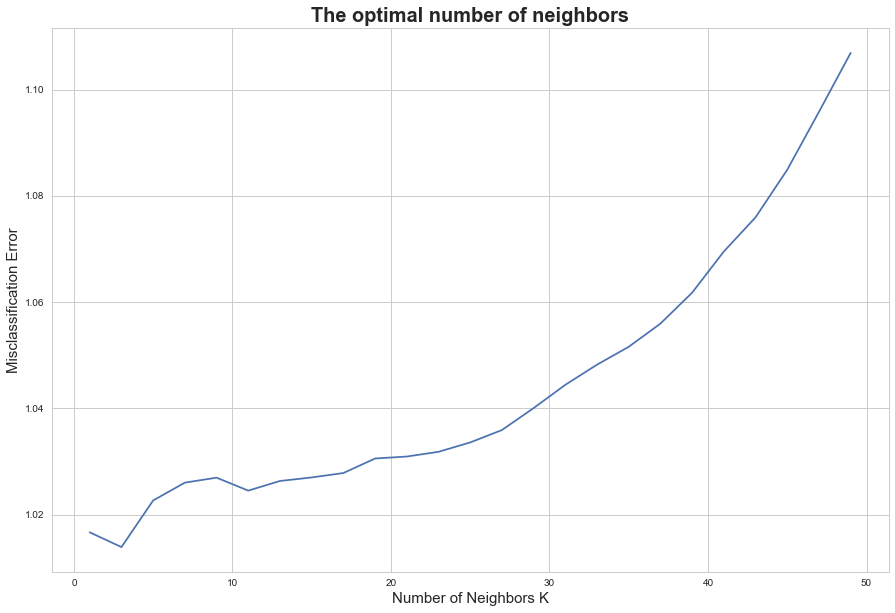

In [502]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [503]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


### 5.4 SVM

In [504]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [505]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

####  Spliting X and y into train and test dataset.

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#### SVR

In [507]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')

In [508]:
clf.fit(X_train, y_train)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [509]:
Y_predict = clf.predict(X_test)

In [510]:
print('Accuracy of SVR on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 79.95
Accuracy of SVR on test set: 74.99


#### Linear SVC

In [511]:
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [512]:
Y_predict = clf_SVC.predict(X_test)

In [513]:
print('Accuracy of SVR on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 95.83
Accuracy of SVR on test set: 86.67


#### SVC

In [514]:
clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=0)

In [515]:
Y_predict = clf_SVC.predict(X_test)

In [516]:
print('Accuracy of SVR on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 98.33
Accuracy of SVR on test set: 90.00


<a id = section501></a>

## 6 Conclusion

1. PCA doesnt seem to have much impact due to the lesser number of components and less variance.
2. The optimal number of neighbors for using in KNN algo is 3.
3. The accuracy of KNN model is 93%.
4. SVC Model (SVM) seems to be having higher accuracy for training set but for test data it is only 90%.

KNN Model seems to be better for predicting as far as this data set is considered.